In [24]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.regularizers import l2
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from keras.callbacks import EarlyStopping

In [2]:
# Carregar a base de dados CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
# Definir os nomes das classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
# Pré-processamento dos dados
x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [5]:
# Carregar a arquitetura do modelo VGG16 (sem incluir a camada densa superior)
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [6]:
# Congelar as camadas convolucionais do modelo VGG16
for layer in vgg_model.layers:
    layer.trainable = False

In [35]:
# Criar um modelo sequencial e adicionar as camadas do modelo VGG16 seguido de camadas densas
model = Sequential()
model.add(vgg_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [36]:
# Compilar o modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

## usar o early stopping pode ajudar a evitar overfitting, parando o treinamento assim que o desempenho de validação começa a deteriorar.

In [38]:
# Treinar o modelo
history = model.fit(x_train, y_train, batch_size=64, epochs=25, validation_data=(x_test, y_test), callbacks=[early_stop])

Epoch 1/25
782/782 [==============================] - 13s 15ms/step - loss: 2.6592 - accuracy: 0.4450 - val_loss: 1.2021 - val_accuracy: 0.5844
Epoch 2/25
782/782 [==============================] - 11s 14ms/step - loss: 1.3006 - accuracy: 0.5548 - val_loss: 1.0982 - val_accuracy: 0.6202
Epoch 3/25
782/782 [==============================] - 10s 13ms/step - loss: 1.1799 - accuracy: 0.5903 - val_loss: 1.0605 - val_accuracy: 0.6376
Epoch 4/25
782/782 [==============================] - 11s 13ms/step - loss: 1.1208 - accuracy: 0.6132 - val_loss: 1.0232 - val_accuracy: 0.6492
Epoch 5/25
782/782 [==============================] - 11s 14ms/step - loss: 1.0760 - accuracy: 0.6260 - val_loss: 1.0162 - val_accuracy: 0.6506
Epoch 6/25
782/782 [==============================] - 10s 13ms/step - loss: 1.0498 - accuracy: 0.6378 - val_loss: 1.0106 - val_accuracy: 0.6589
Epoch 7/25
782/782 [==============================] - 11s 15ms/step - loss: 1.0192 - accuracy: 0.6485 - val_loss: 1.0074 - val_accuracy:

In [39]:
# Avaliar o modelo
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)


313/313 [==============================] - 2s 7ms/step


Text(0.5, 1.0, 'Matriz de Confusão - CIFAR-10')

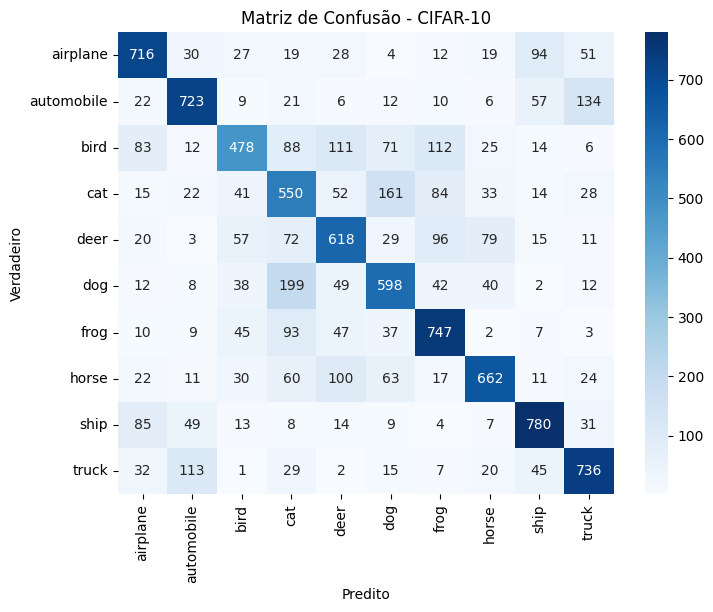

In [40]:
# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - CIFAR-10')


Text(0.5, 1.0, 'Matriz de Confusão Normalizada - CIFAR-10')

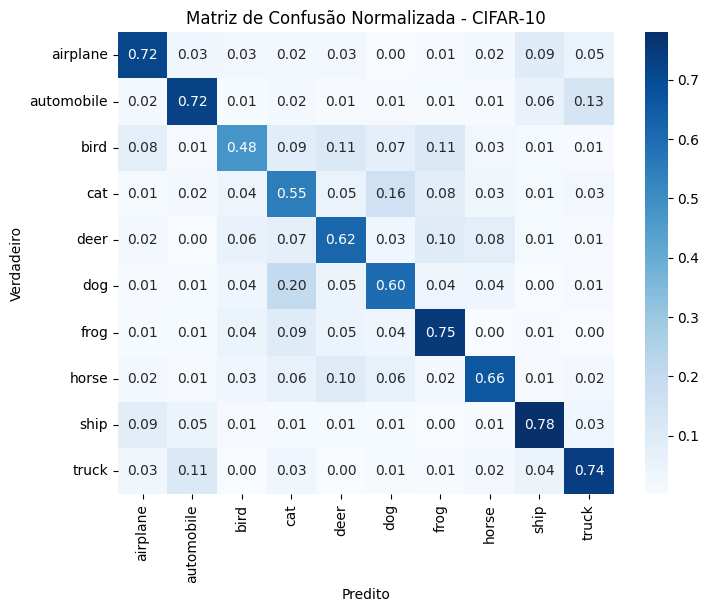

In [41]:
# Plotar a matriz de confusão normalizada
class_counts = np.sum(confusion_mtx, axis=1)
confusion_mtx_norm = confusion_mtx / class_counts[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx_norm, annot=True, fmt=".2f", cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão Normalizada - CIFAR-10')

Exception ignored in: <function _xla_gc_callback at 0x78dfff520550>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 98, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


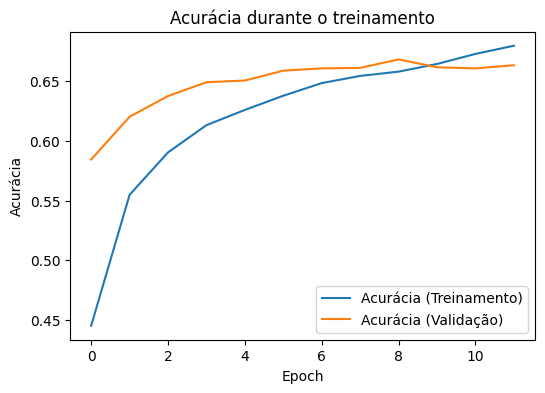

In [42]:
# Plotar gráfico de acurácia
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], label='Acurácia (Treinamento)')
plt.plot(history.history['val_accuracy'], label='Acurácia (Validação)')
plt.title('Acurácia durante o treinamento')
plt.xlabel('Epoch')
plt.ylabel('Acurácia')
plt.legend()

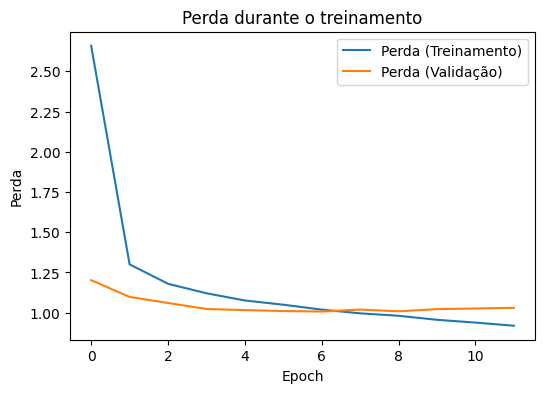

In [44]:
# Plotar gráfico de perda
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Perda (Treinamento)')
plt.plot(history.history['val_loss'], label='Perda (Validação)')
plt.title('Perda durante o treinamento')
plt.xlabel('Epoch')
plt.ylabel('Perda')
plt.legend()

plt.show()